In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv("Final_Train_Data.csv")

In [3]:
df.shape

(891, 11)

In [4]:
X = df.drop('Survived',axis=1)

In [5]:
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
Scaled_X_train = scaler.fit_transform(X_train)

In [42]:
Scaled_X_test = scaler.transform(X_test)

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
error = []

for i in range(1,12):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(Scaled_X_train,y_train)
    y_prediction = model.predict(Scaled_X_test)
    
    err = 1 - accuracy_score(y_test,y_prediction)
    error.append(err)

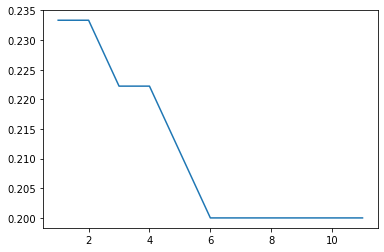

In [64]:
# plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,12),error)

In [65]:
final_model = AdaBoostClassifier(n_estimators=6)
final_model.fit(Scaled_X_train,y_train)
y_prediction = final_model.predict(Scaled_X_test)

In [66]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        51
         1.0       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



In [67]:
confusion_matrix(y_test,y_prediction)

array([[45,  6],
       [12, 27]], dtype=int64)

In [17]:
y_prediction

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1.])

In [152]:
# SVM Model Prediction

In [153]:
from sklearn.svm import SVR

In [154]:
svr_model = SVR()

In [155]:
svr_model.fit(X_train,y_train)

SVR()

In [156]:
y_predictions = svr_model.predict(X_test)

In [160]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]
             }

In [161]:
grid_model = GridSearchCV(estimator=svr_model,param_grid=param_grid)

In [ ]:
grid_model.fit(X_train,y_train)

In [166]:
y_predictions = grid_model.predict(Scaled_X_test)

In [18]:
# print(classification_report(y_test,y_predictions))

In [163]:
# Random Forest Model predictions

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
n_estimators = [10,50,100,200,300]

grid_param = {'n_estimators':n_estimators}

In [21]:
model_Rf = RandomForestClassifier()

In [22]:
model = GridSearchCV(estimator=model_Rf,param_grid=grid_param)

In [23]:
model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200, 300]})

In [91]:
model.best_params_

{'n_estimators': 300}

In [24]:
model_Rf = RandomForestClassifier(n_estimators=200)

In [25]:
model_Rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
y_predictions = model_Rf.predict(X_test)

In [27]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85        51
         1.0       0.92      0.62      0.74        39

    accuracy                           0.81        90
   macro avg       0.84      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



In [28]:
confusion_matrix(y_test,y_predictions)

array([[49,  2],
       [15, 24]], dtype=int64)

In [117]:
# Decision Trees Model Predictions

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
criterion = ["gini", "entropy"]
max_features = ['auto','sqrt']
grid_param = {'criterion':criterion,'max_features':max_features}

In [123]:
model_decision = DecisionTreeClassifier()

In [124]:
grid_model = GridSearchCV(estimator=model_decision,param_grid=grid_param)

In [125]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt']})

In [126]:
grid_model.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt'}

In [128]:
y_predictions = grid_model.predict(X_test)

In [130]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72        51
         1.0       0.64      0.54      0.58        39

    accuracy                           0.67        90
   macro avg       0.66      0.65      0.65        90
weighted avg       0.66      0.67      0.66        90



In [131]:
# KNN model predictions

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(Scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

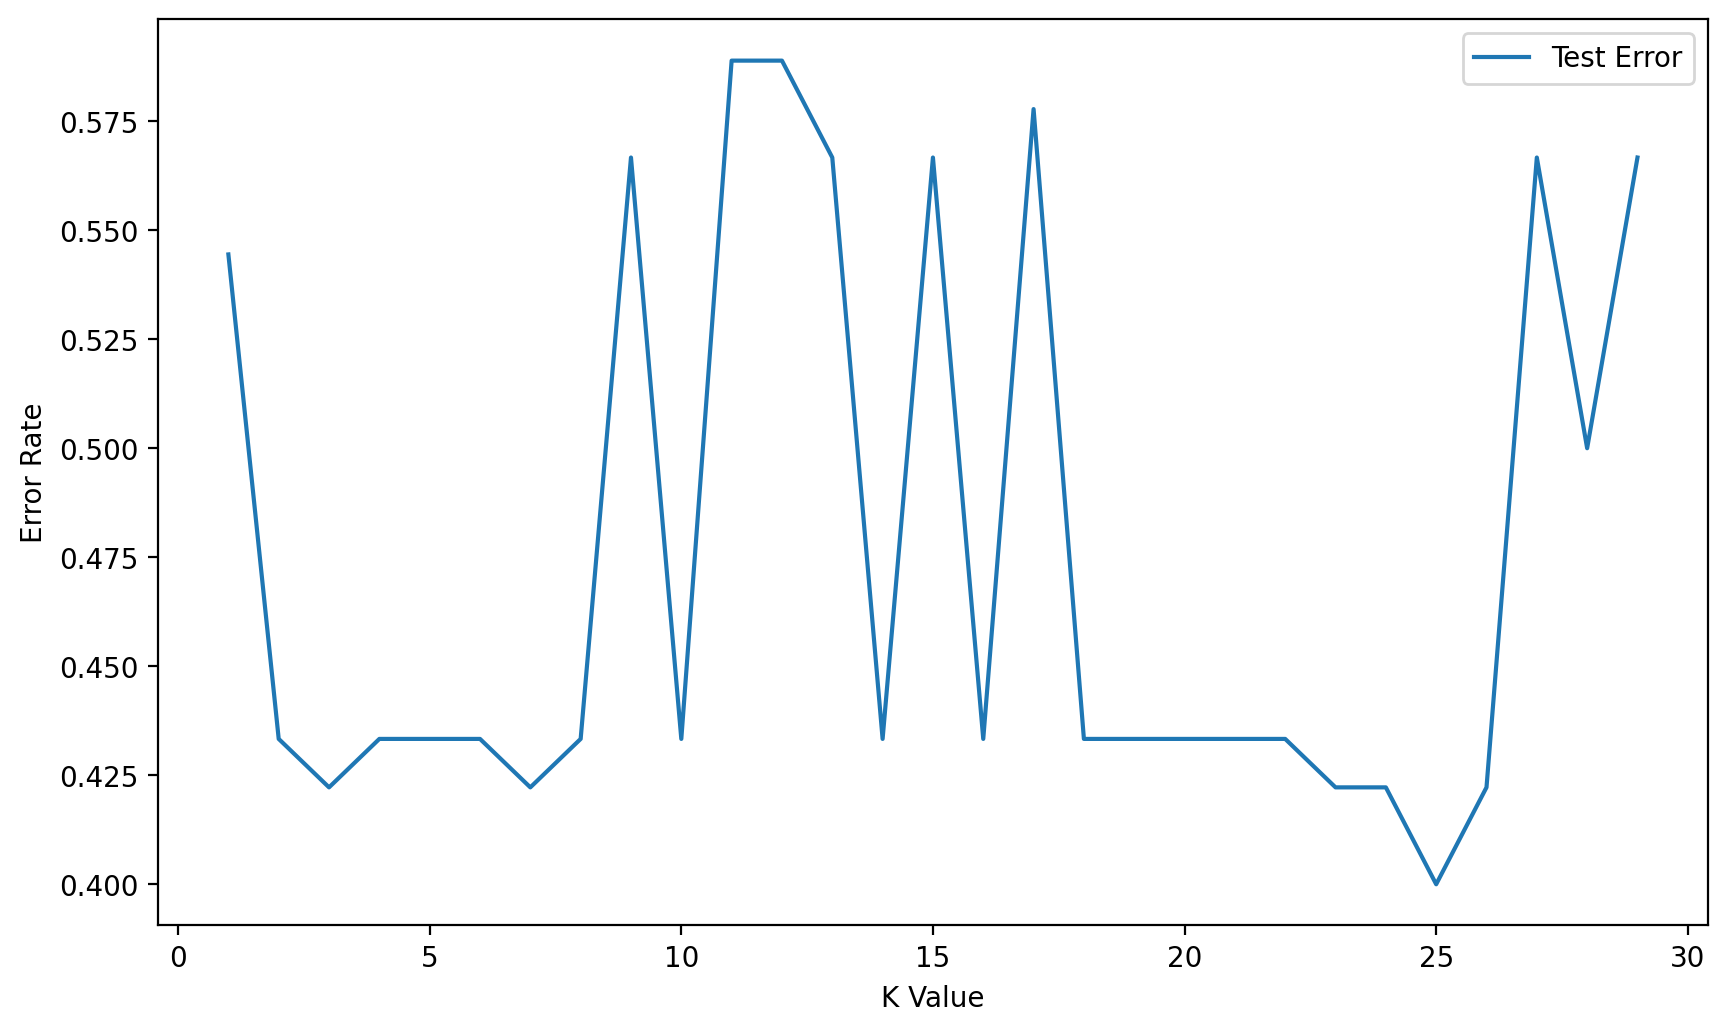

In [45]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [59]:
model_knn = KNeighborsClassifier()

In [60]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
y_predictions = model_knn.predict(X_test)

In [62]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

         0.0       0.60      0.78      0.68        51
         1.0       0.52      0.31      0.39        39

    accuracy                           0.58        90
   macro avg       0.56      0.55      0.53        90
weighted avg       0.56      0.58      0.55        90

